In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('patient_priority.csv')
df.head()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked,yellow
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked,yellow
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked,yellow


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked,yellow
1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked,yellow
3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked,yellow


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6962 non-null   float64
 1   gender             6961 non-null   float64
 2   chest pain type    6962 non-null   float64
 3   blood pressure     6962 non-null   float64
 4   cholesterol        6962 non-null   float64
 5   max heart rate     6962 non-null   float64
 6   exercise angina    6962 non-null   float64
 7   plasma glucose     6962 non-null   float64
 8   skin_thickness     6962 non-null   float64
 9   insulin            6962 non-null   float64
 10  bmi                6962 non-null   float64
 11  diabetes_pedigree  6962 non-null   float64
 12  hypertension       6962 non-null   float64
 13  heart_disease      6962 non-null   float64
 14  Residence_type     6962 non-null   object 
 15  smoking_status     6962 non-null   object 
 16  triage             6552 

In [6]:
#Checking missing values
df.isna().sum()

age                    0
gender                 1
chest pain type        0
blood pressure         0
cholesterol            0
max heart rate         0
exercise angina        0
plasma glucose         0
skin_thickness         0
insulin                0
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
Residence_type         0
smoking_status         0
triage               410
dtype: int64

In [7]:
numeric_df=df.select_dtypes(include=['float', 'int'])
numeric_df.head()

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0
2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0
4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0


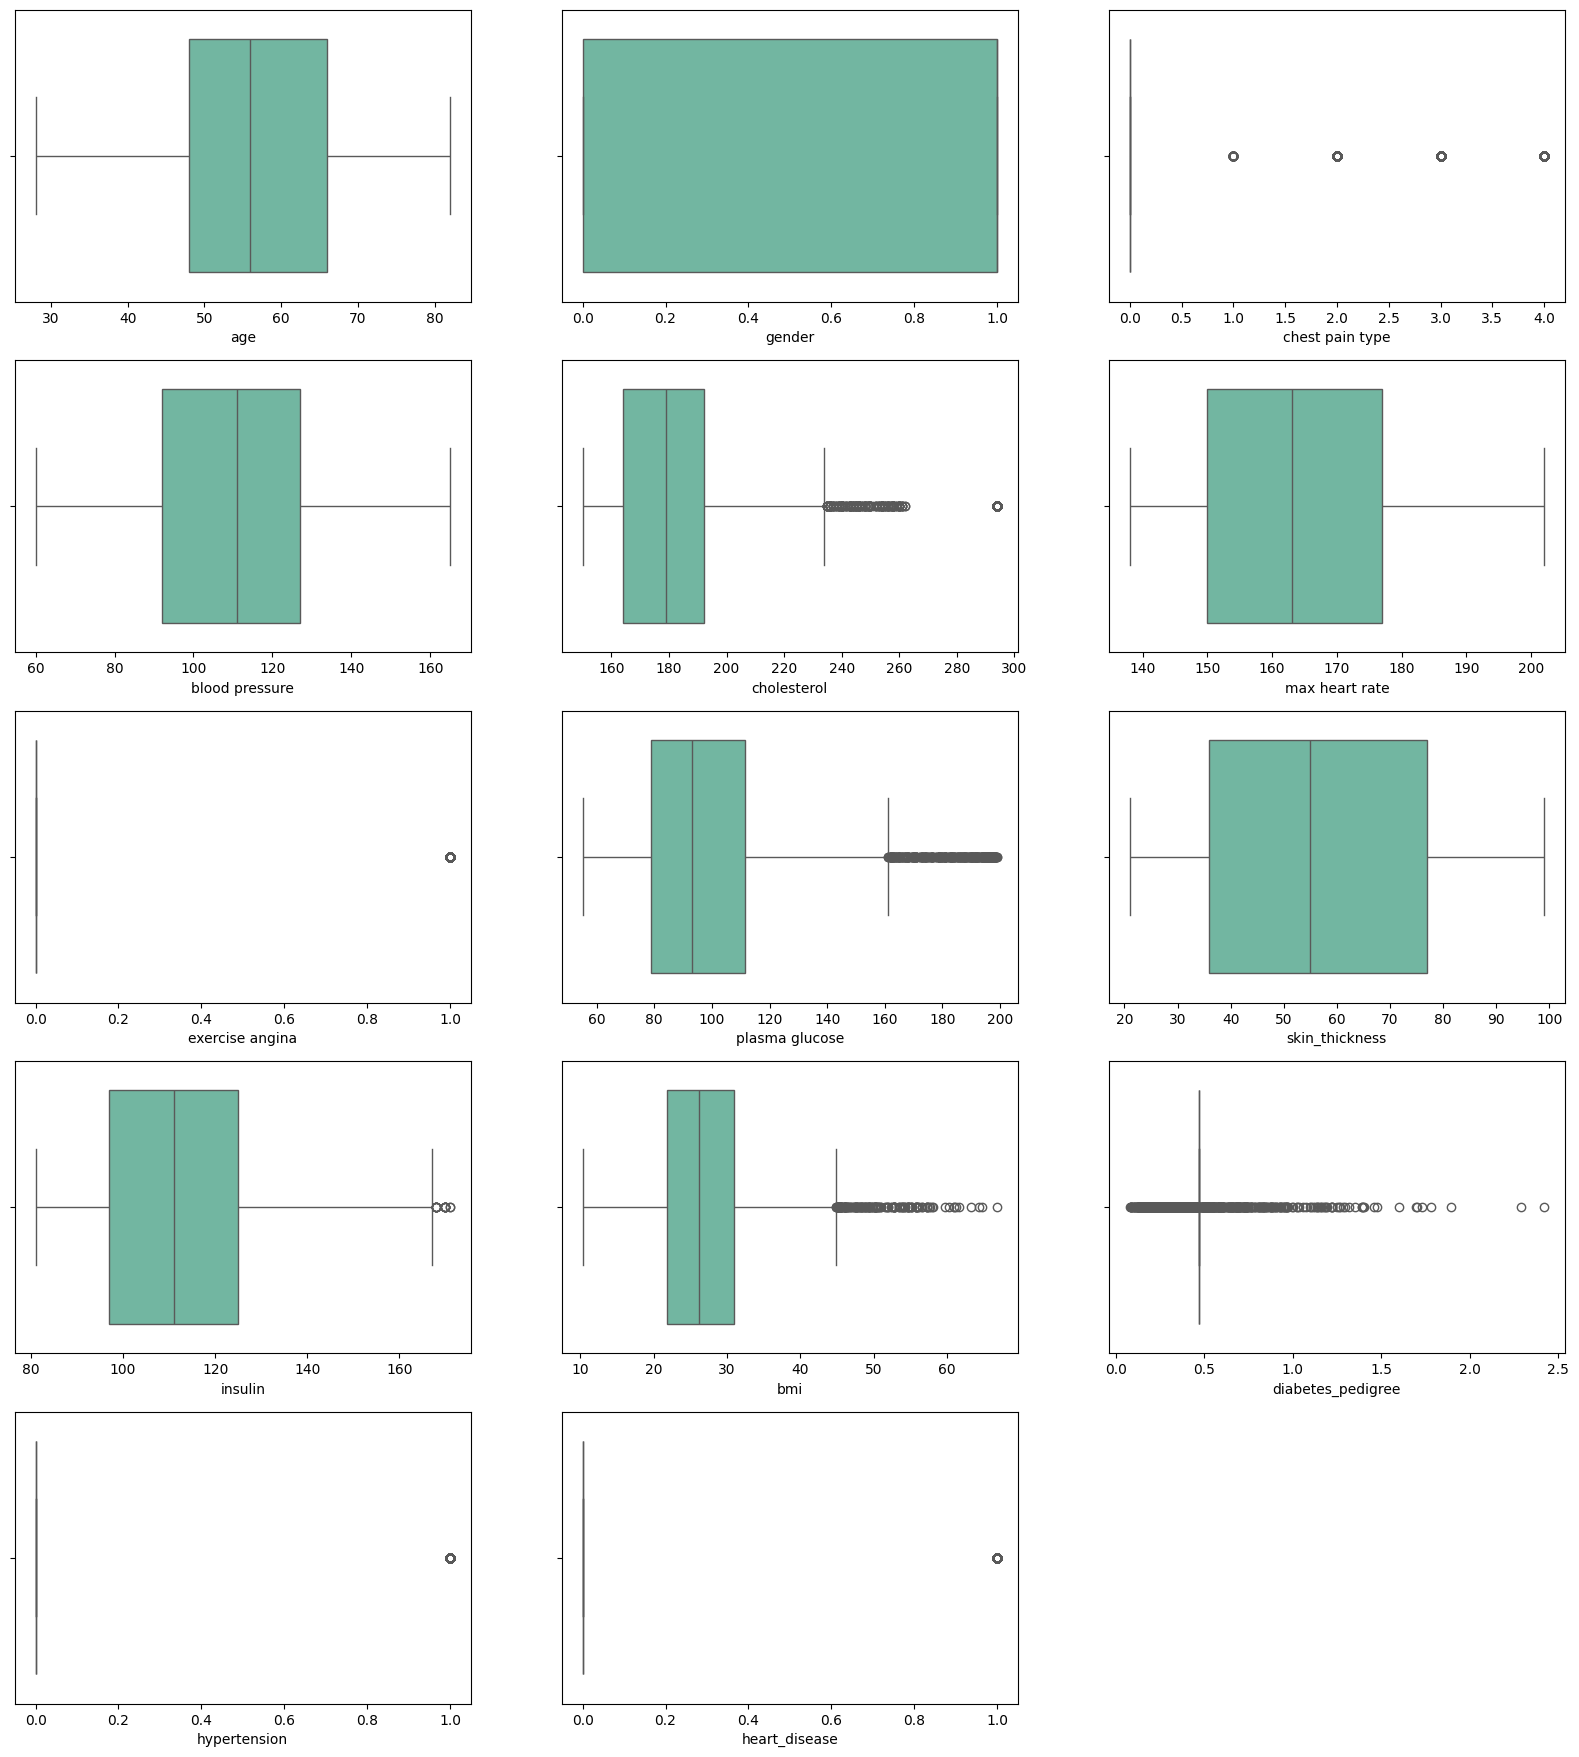

In [8]:
#Outlier Detection
plt.figure(figsize=(20,22))
for i in range(len(numeric_df.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=df[numeric_df.columns[i]], palette='Set2')
    plt.tight_layout
plt.show()

--> Chest pain type, cholesterol, excercise_angina, plasma_glucose, insulin, bmi, diabetes_pedigree, hypertension, heart_disease
have outliers

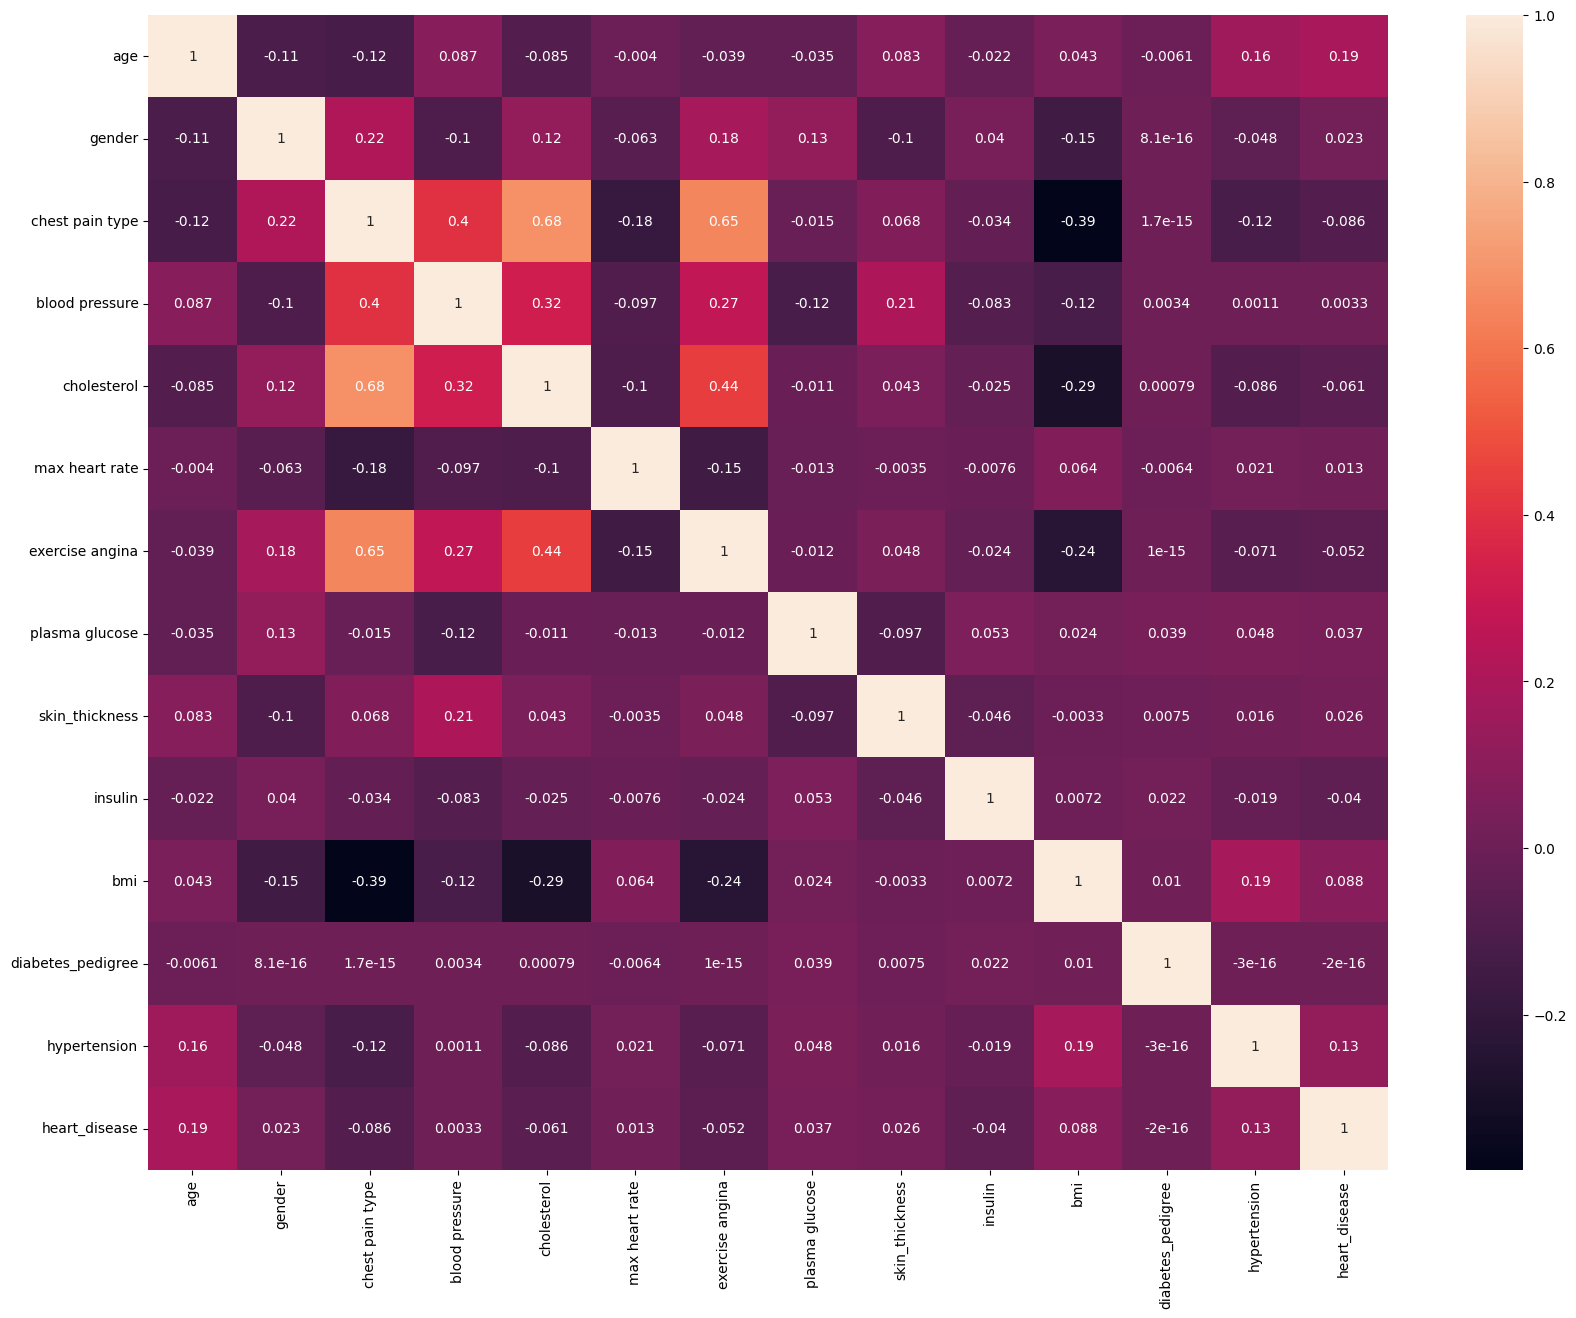

In [9]:
#Correlation between Numerical - Numerical columns
plt.figure(figsize=(20, 15))
sns.heatmap(numeric_df.corr(), annot=True, color=sns.color_palette("hls"))
plt.show()

In [10]:
df['age'].value_counts()

age
54.0    265
45.0    239
41.0    239
51.0    230
57.0    225
43.0    212
55.0    210
50.0    209
53.0    209
60.0    207
62.0    202
48.0    200
42.0    200
58.0    199
46.0    193
52.0    192
44.0    185
59.0    183
56.0    180
49.0    179
61.0    175
63.0    170
47.0    166
40.0    166
78.0    157
65.0    137
79.0    136
64.0    133
66.0    131
81.0    124
71.0    120
67.0    113
69.0    112
80.0    112
68.0    106
75.0     96
70.0     96
72.0     85
82.0     85
77.0     80
73.0     78
76.0     73
74.0     63
38.0     17
39.0     17
35.0     14
37.0     13
34.0      9
36.0      6
32.0      5
29.0      4
31.0      2
33.0      2
28.0      1
Name: count, dtype: int64

In [11]:
#as age column have too many values , performing binning on it
bins=[20,30,40,50,60,70,80,90]
labels=['20-30','30-40','40-50','50-60','60-70', '70-80', '80-90']
df['age_range']=pd.cut(df['age'], bins=bins, labels=labels)
df['age_range']

0       30-40
1       40-50
2       30-40
3       40-50
4       50-60
        ...  
6957    70-80
6958    80-90
6959    80-90
6960    50-60
6961    40-50
Name: age_range, Length: 6962, dtype: category
Categories (7, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80' < '80-90']

In [12]:
df['blood pressure']

0       140.0
1       160.0
2       130.0
3       138.0
4       150.0
        ...  
6957    111.0
6958    123.0
6959    127.0
6960    123.0
6961    125.0
Name: blood pressure, Length: 6962, dtype: float64

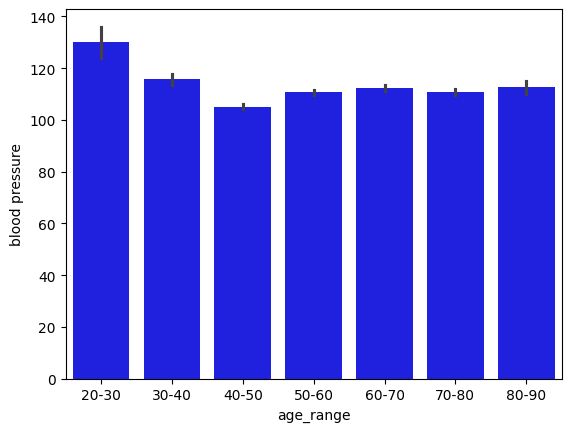

In [13]:
sns.barplot(x=df['age_range'], y=df['blood pressure'], color='blue')
plt.show()

--> from age of 40 or above patients , blood pressure is low (ideal systolic pressure is around 120)

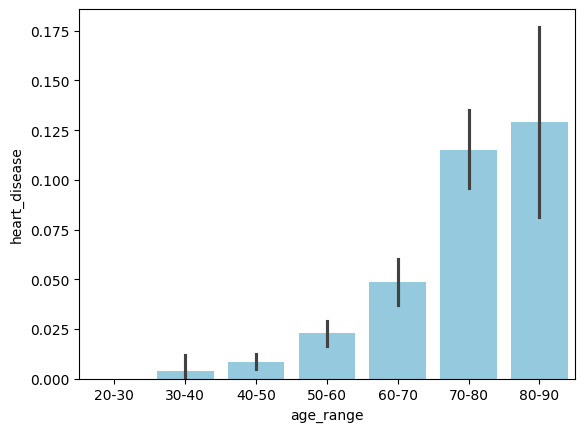

In [14]:
sns.barplot(x=df['age_range'], y=df['heart_disease'], color='skyblue')
plt.show()

--> age group of 70 or above have higher chances of heart disease

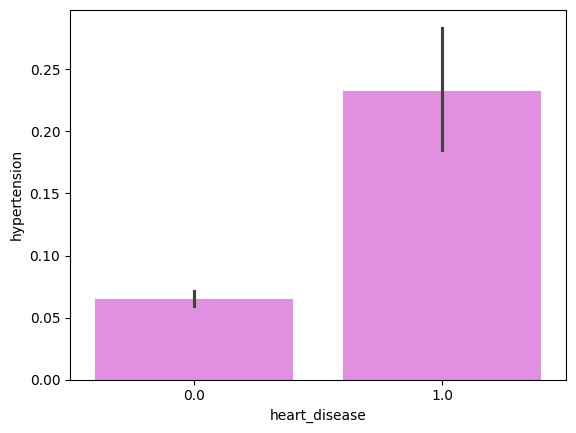

In [15]:
sns.barplot(x=df['heart_disease'], y=df['hypertension'], color='violet')
plt.show()

--> Patients having heart disease are more likely to have problem of hypertension

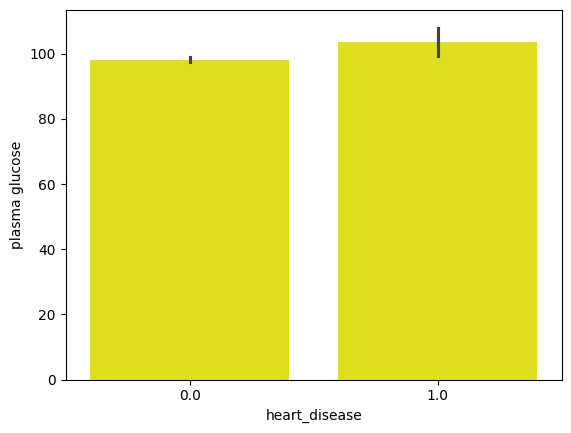

In [16]:
sns.barplot(x=df['heart_disease'], y=df['plasma glucose'], color='yellow')
plt.show()

--> Patients having heart disease are also having higher level of blood glucose as compared to those who do not have heart disease

In [17]:
df['chest pain type']

0       2.0
1       3.0
2       2.0
3       4.0
4       3.0
       ... 
6957    0.0
6958    0.0
6959    0.0
6960    0.0
6961    0.0
Name: chest pain type, Length: 6962, dtype: float64

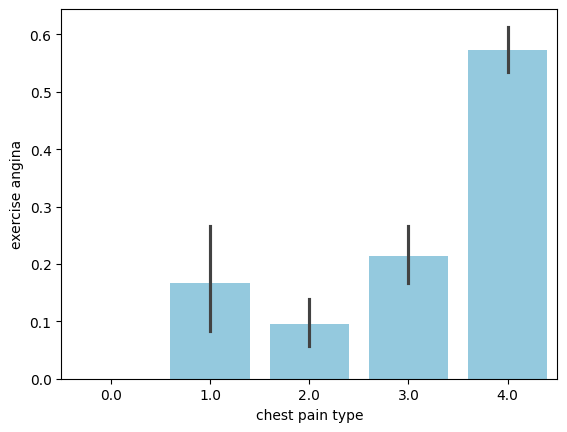

In [18]:
sns.barplot(x=df['chest pain type'], y=df['exercise angina'], color='skyblue')
plt.show()

--> chest pain type 4 patients have more severe heart disease with fewer warning signs , higher exercise induces the angina which reveals their pain 

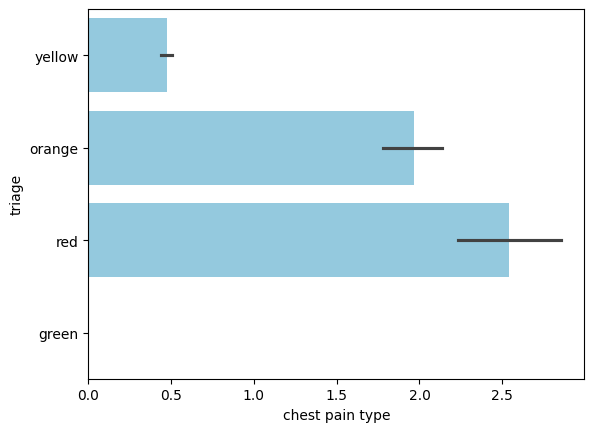

In [19]:
sns.barplot(x=df['chest pain type'], y=df['triage'], color='skyblue')
plt.show()

### Imputation

--> patients having higher chest pain type have triage of red

In [20]:
df['gender']=df['gender'].fillna(df['gender'].mode()[0])
df['triage']=df['triage'].fillna('Unknown')


In [21]:
df.isna().sum()

age                  0
gender               0
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
triage               0
age_range            0
dtype: int64

### Outlier Treatment

In [22]:
for col in df[['chest pain type', 'cholesterol', 'exercise angina', 'plasma glucose', 'insulin', 'bmi', 'diabetes_pedigree',
              'hypertension', 'heart_disease']]:
    

    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    upper_whisker=Q3+1.5*IQR
    lower_whisker=Q1-1.5*IQR
    df[col]=df[col].clip(lower=lower_whisker, upper=upper_whisker)

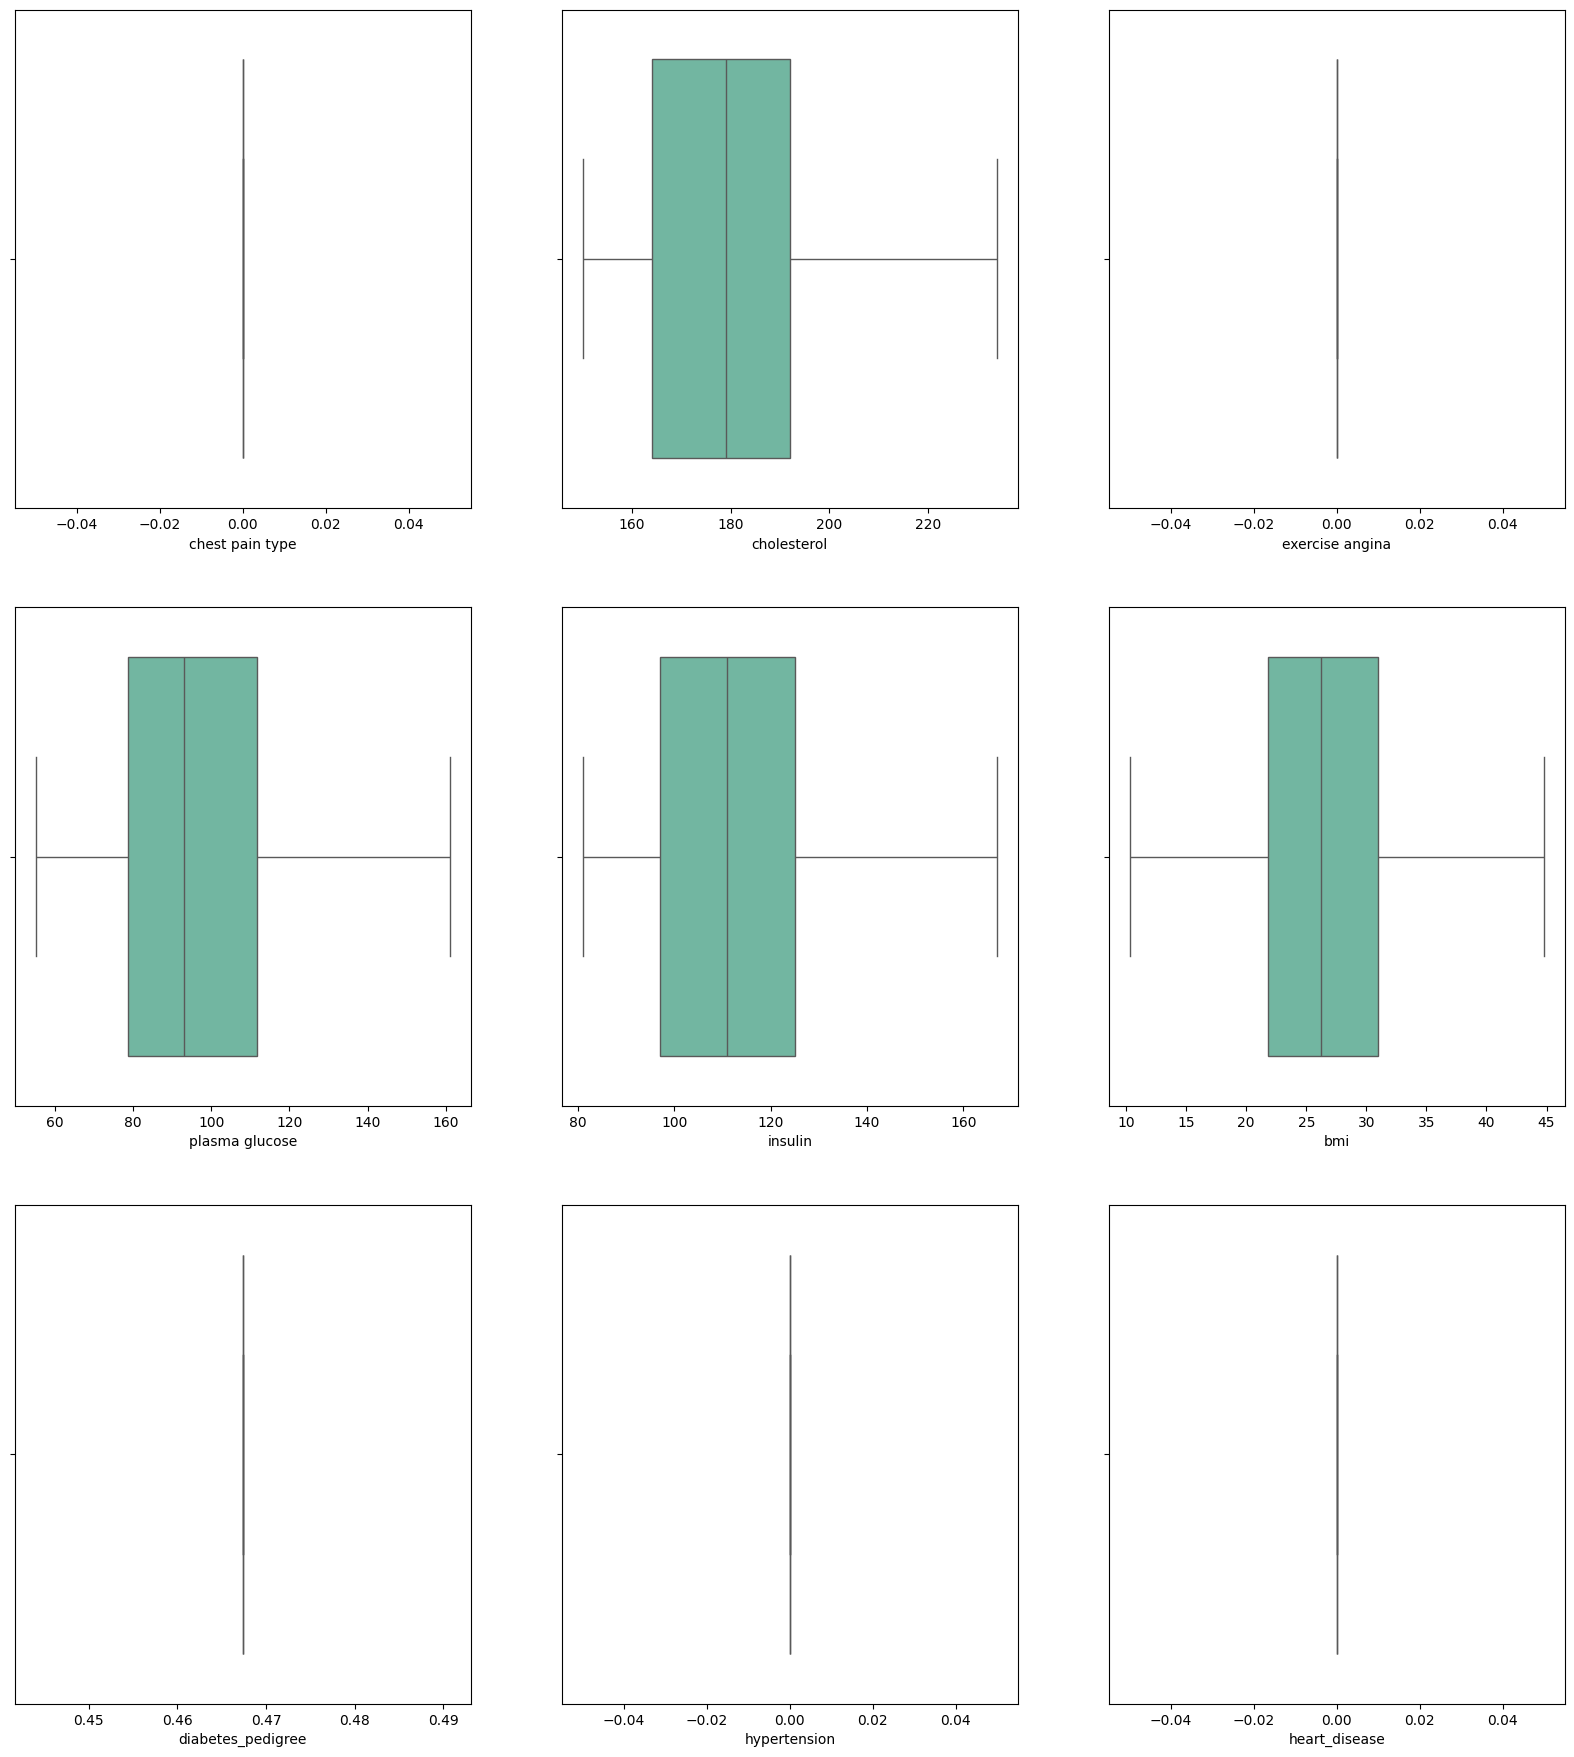

In [23]:
df_outlier= df[['chest pain type', 'cholesterol', 'exercise angina', 'plasma glucose', 'insulin', 'bmi', 'diabetes_pedigree',
              'hypertension', 'heart_disease']]

plt.figure(figsize=(20,22))
for i in range(len(df_outlier.columns)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[df_outlier.columns[i]], palette='Set2')
    plt.tight_layout
plt.show()

## Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in df[['Residence_type', 'smoking_status', 'triage' ]]:
    df[col]=encoder.fit_transform(df[col])
    

In [25]:
df.head()

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage,age_range
0,40.0,1.0,0.0,140.0,234.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,1,2,4,30-40
1,49.0,0.0,0.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,1,2,2,40-50
2,37.0,1.0,0.0,130.0,234.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,1,2,4,30-40
3,48.0,0.0,0.0,138.0,214.0,156.0,0.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,1,2,2,40-50
4,54.0,1.0,0.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,1,2,4,50-60


## Standardization

In [26]:
df.drop('age_range', axis=1, inplace=True)
#as this column was made just to observe the relation of age with other variables

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df)

### KMeans Clustering with Hyperparameter Tuning

In [28]:
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,16):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    results=kmeans.fit(scaled_data)
    inertia.append(results.inertia_)

inertia

[7780.831916225245,
 5957.843324626613,
 4949.361358702099,
 4703.11011223269,
 4041.16555961619,
 4021.6229497086783,
 3799.99718055251,
 3606.7684928114154,
 3471.3204092299484,
 3200.2680995392343,
 3105.5269388363004,
 3145.635285121589,
 2875.930684275593,
 2849.836138425796,
 2815.711643730873]

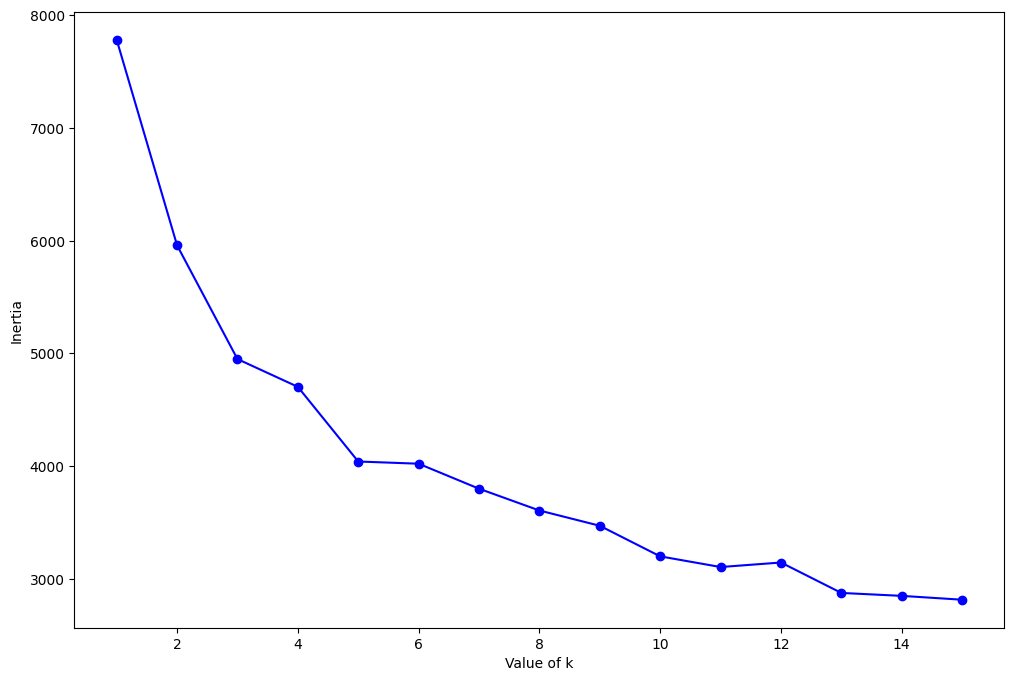

In [29]:
plt.figure(figsize=(12,8))
plt.plot(range(1,16), inertia, 'bo-')
plt.xlabel('Value of k')
plt.ylabel('Inertia')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score
SilhouetteScore=[]
for j in range(2,16):
    kmeans=KMeans(n_clusters=j, init='k-means++')
    kmeans.fit(scaled_data)
    score=silhouette_score(scaled_data, kmeans.labels_)
    SilhouetteScore.append(score)

SilhouetteScore

[np.float64(0.22994315370841525),
 np.float64(0.23395458179733733),
 np.float64(0.2716970560474686),
 np.float64(0.23003278373728386),
 np.float64(0.20245008860201982),
 np.float64(0.211918861150179),
 np.float64(0.21170654091660177),
 np.float64(0.18177074597065113),
 np.float64(0.20307824465310542),
 np.float64(0.18780339921374747),
 np.float64(0.18800083095975187),
 np.float64(0.182707358242428),
 np.float64(0.1898408850398007),
 np.float64(0.18483174816757922)]

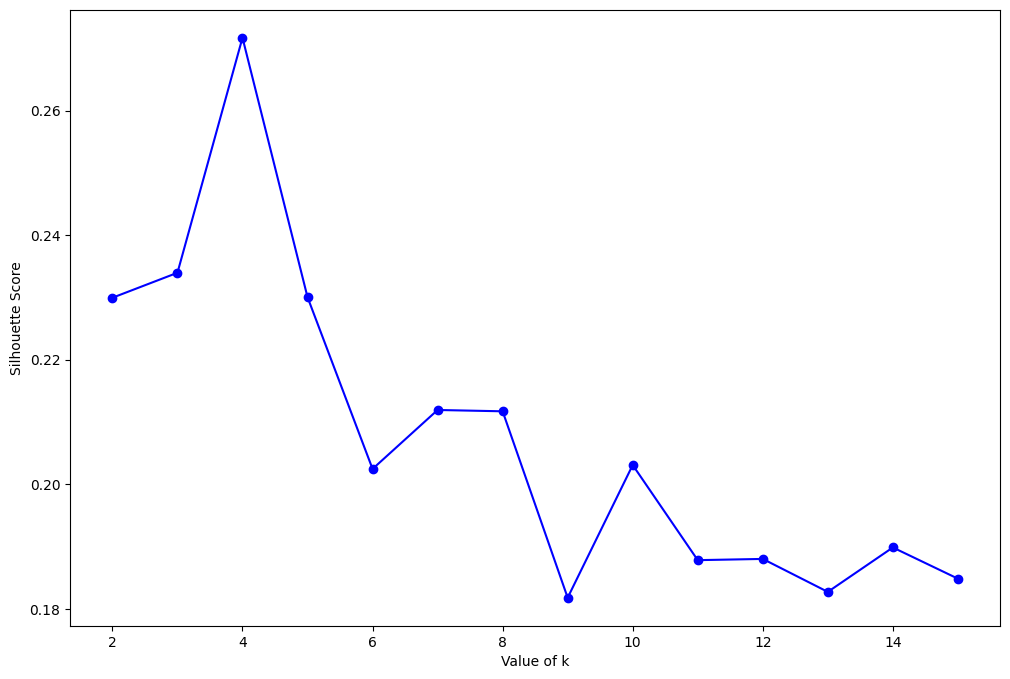

In [31]:
plt.figure(figsize=(12,8))
plt.plot(range(2,16), SilhouetteScore, 'bo-')
plt.xlabel('Value of k')
plt.ylabel('Silhouette Score')
plt.show()

 --> At k=4 Silhouette score is high , therefore selecting k=4 (no. of clusters=4)

In [39]:
k=4
kmeans=KMeans(n_clusters=k, init='k-means++' )
kmeans.fit_transform(scaled_data)

array([[1.71930704, 0.80092392, 1.40500386, 1.34395235],
       [1.29472871, 1.26244323, 1.64379916, 0.77459559],
       [1.68024731, 0.72445898, 1.35279565, 1.29303715],
       ...,
       [0.70780867, 1.59029425, 1.23345061, 1.20947873],
       [1.43188683, 1.39624847, 1.00618163, 1.74825855],
       [1.16635905, 1.22413731, 1.52807495, 0.62600992]])

In [40]:
kmeans_labels=kmeans.predict(scaled_data)
np.unique(kmeans_labels)

array([0, 1, 2, 3], dtype=int32)

In [41]:
print('WCSS:', kmeans.inertia_)

WCSS: 4336.342029336409


In [42]:
print('Silhouette Score:', silhouette_score(scaled_data, kmeans.labels_))

Silhouette Score: 0.2716970560474686


### Visualizing clusters by kmeans using TSNE

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_data)

In [37]:
X_tsne

array([[ 35.583122 ,  22.817822 ],
       [ -2.6926208,  68.58778  ],
       [ 35.86149  ,  23.225565 ],
       ...,
       [-27.157188 ,  -5.574508 ],
       [ 28.65242  , -68.171074 ],
       [-37.566414 ,  40.201744 ]], dtype=float32)

<Figure size 640x480 with 0 Axes>

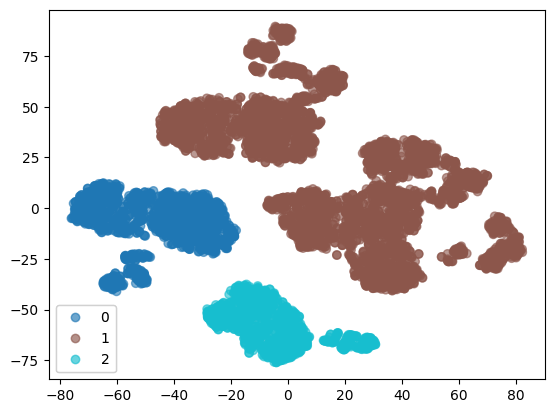

In [38]:
plt.set_cmap('tab10')

fig, ax=plt.subplots()
scatter=ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, alpha=0.6)
#c=digits.target assigns colors to data points based on digits.target labels
legend=ax.legend(*scatter.legend_elements(), loc='lower left')
#scatter.legend_elements() creates the legend entries based on the colors in the scatter plot
#the * unpacks the entries in the legend() method
ax.add_artist(legend)
#scatter.legend_elements() creates a custom legend that is not automatically linked to the plot, ax.add_artist(legend) explicitly 
#adds the legend to the axes (ax)
plt.show()
plt.close()

### --> The clsuters by kmeans are well separated 

In [36]:
data1=pd.DataFrame(scaled_data, columns=df.columns, index=df.index)
data1['label']=pd.Series(kmeans_labels , index=data1.index)
data1.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status,label
0,-1.411160,1.086750,1.318087,2.420060,-1.340840,1.537505,-1.006354,-1.067290,-1.223635,-0.737566,0.693118,-1.180427,0.997337,1.003673,0.925128,0.600964,3
1,-1.173253,-0.920175,1.318087,-0.044672,-0.432369,0.045985,-1.006354,0.819540,-0.815278,-0.056532,-0.374450,-1.464958,0.997337,1.003673,0.925128,2.195032,3
2,-0.364370,-0.920175,0.428390,2.420060,-0.470222,1.101522,-1.006354,-0.244311,-0.769905,-0.988473,0.683890,1.707102,0.997337,-0.996340,-1.080932,-0.993104,1
3,0.920327,-0.920175,-0.461308,-0.735719,-0.186325,-0.458838,-1.006354,-1.127508,0.772778,1.269693,-0.970392,0.257191,-1.002670,1.003673,-1.080932,0.600964,2
4,-0.221626,1.086750,0.428390,-0.989103,-0.886605,1.078576,-1.006354,0.016634,-1.314381,1.448912,-1.477234,-1.097297,0.997337,1.003673,-1.080932,0.600964,3


In [37]:
clustered_df1=data1.groupby('label').mean()

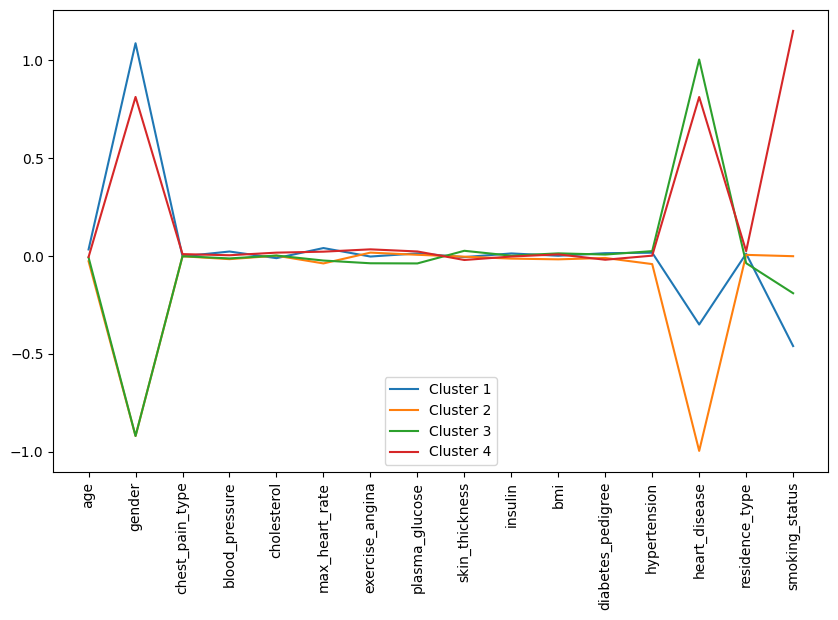

In [38]:
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.figure(figsize=(10,6))
plt.plot(clustered_df1.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)
plt.show()

--> Most features have similarity in all clusters

### Gaussian Mixture Model with Hyperparameter Tuning

In [ ]:
from sklearn.mixture import GaussianMixture
SilhouetteScore=[]
for j in range(2,16):
    gmm=GaussianMixture(n_components=j)
    labels_gmm=gmm.fit_predict(scaled_data)
    score=silhouette_score(scaled_data, labels_gmm)
    SilhouetteScore.append(score)

SilhouetteScore


In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(2,16), SilhouetteScore, marker='o')
plt.xlabel('No. of components(k)')
plt.ylabel('Silhoeutte Score')
plt.title('Silhouette Score for Different k in GMM')
plt.show()

In [ ]:
gmm=GaussianMixture(n_components=4)
gmm.fit(scaled_data)

In [101]:
labels_gmm=gmm.predict(scaled_data)
np.unique(labels_gmm)

array([0, 1, 2, 3])

In [102]:
print('Silhouette Score:', silhouette_score(scaled_data, labels_gmm))

Silhouette Score: 0.06581708903617212


In [103]:
tsne=TSNE(2)
gmm_tsne=tsne.fit_transform(scaled_data)

### Visualizing clusters by GMM using TSNE

<Figure size 640x480 with 0 Axes>

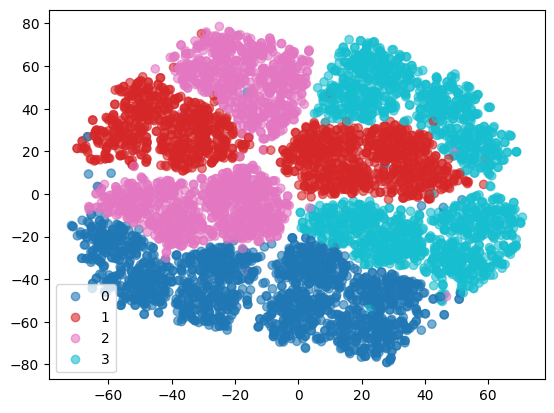

In [104]:
plt.set_cmap('tab10')
fig, ax=plt.subplots()
scatter=ax.scatter(gmm_tsne[:, 0], gmm_tsne[:, 1], c=labels_gmm, alpha=0.6)
legend=ax.legend(*scatter.legend_elements(), loc='lower left')
plt.show()

### --> The clusters formed by GMM are not well separated , overlapping in between clusters is seen.

In [105]:
data2=pd.DataFrame(scaled_data, columns=df.columns, index=df.index)
data2['label']=pd.Series(labels_gmm, index=data2.index)
data2.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status,label
0,-1.411160,1.086750,1.318087,2.420060,-1.340840,1.537505,-1.006354,-1.067290,-1.223635,-0.737566,0.693118,-1.180427,0.997337,1.003673,0.925128,0.600964,3
1,-1.173253,-0.920175,1.318087,-0.044672,-0.432369,0.045985,-1.006354,0.819540,-0.815278,-0.056532,-0.374450,-1.464958,0.997337,1.003673,0.925128,2.195032,3
2,-0.364370,-0.920175,0.428390,2.420060,-0.470222,1.101522,-1.006354,-0.244311,-0.769905,-0.988473,0.683890,1.707102,0.997337,-0.996340,-1.080932,-0.993104,0
3,0.920327,-0.920175,-0.461308,-0.735719,-0.186325,-0.458838,-1.006354,-1.127508,0.772778,1.269693,-0.970392,0.257191,-1.002670,1.003673,-1.080932,0.600964,2
4,-0.221626,1.086750,0.428390,-0.989103,-0.886605,1.078576,-1.006354,0.016634,-1.314381,1.448912,-1.477234,-1.097297,0.997337,1.003673,-1.080932,0.600964,2


In [106]:
clustered_df2=data2.groupby('label').mean()

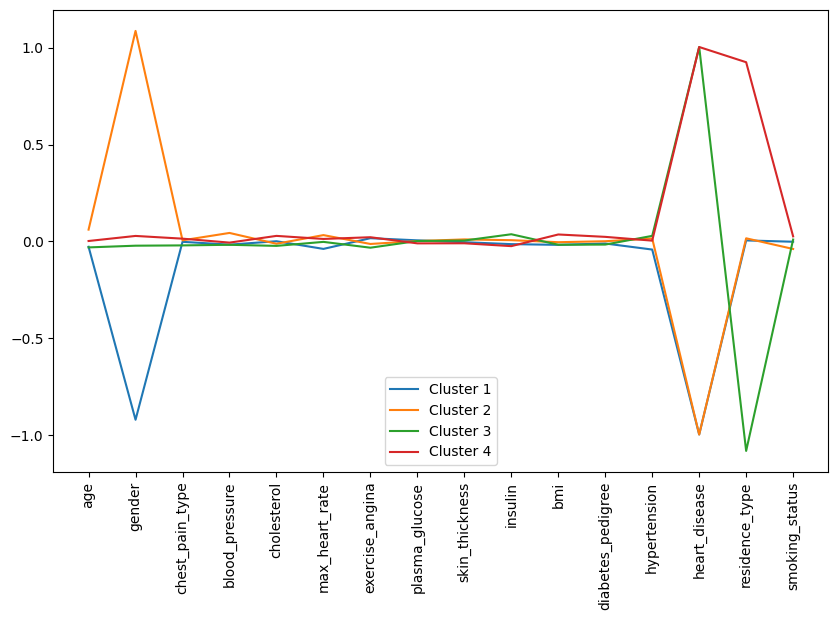

In [107]:
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.figure(figsize=(10,6))
plt.plot(clustered_df2.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)
plt.show()

--> CLuster 1 : inidividuals belonging to this cluster have are those who have diabetes (HIGH RISK PATIENTS)

--> Cluster 2 : inidividuals belonging to this cluster have problem of hypertension

--> Cluster 3 : inidividuals belonging to this cluster have least chances of hypertension (LOW RISK PATIENTS)

--> Cluster 4 : inidividuals belonging to this cluster have problem of hypertension and high heart rate (HIGH RISK PATIENTS)

### Hierarchical CLustering (Agglomerative Clustering)

In [108]:
from sklearn.cluster import AgglomerativeClustering

for i in range(2,9):
    clustering=AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    predictions=clustering.fit_predict(scaled_data)
    SilhouetteScore=silhouette_score(scaled_data, predictions)
    print(f'The Silhouette Score for n_cluster={i} is : {SilhouetteScore}')
    

The Silhouette Score for n_cluster=2 is : 0.024882790394171867
The Silhouette Score for n_cluster=3 is : 0.014303298856636724
The Silhouette Score for n_cluster=4 is : 0.011574017341573647
The Silhouette Score for n_cluster=5 is : 0.01036776705853796
The Silhouette Score for n_cluster=6 is : 0.010280117630553637
The Silhouette Score for n_cluster=7 is : 0.007972832357423954
The Silhouette Score for n_cluster=8 is : 0.0066025565057139975


In [109]:
agg_clus=AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels_agg=agg_clus.fit_predict(scaled_data)

In [110]:
print(f'Silhouette Score : {silhouette_score(scaled_data, labels_agg)}')

Silhouette Score : 0.014303298856636724


### Visualizing the clusters by Agglomerative Clustering using TSNE

In [111]:
tsne=TSNE(2)
agg_tsne=tsne.fit_transform(scaled_data)

<Figure size 640x480 with 0 Axes>

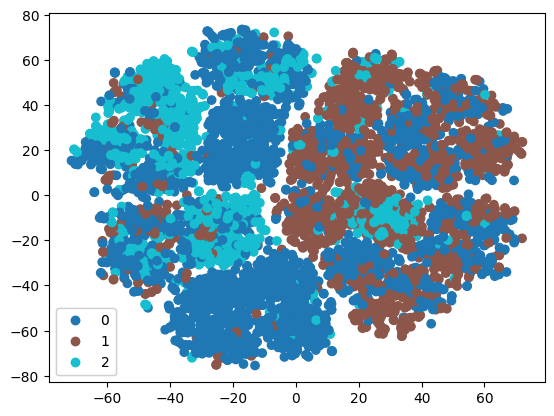

In [112]:
plt.set_cmap('tab10')
fig, ax=plt.subplots()
scatter=ax.scatter(agg_tsne[:, 0], agg_tsne[:,1], c=labels_agg)
legend=ax.legend(*scatter.legend_elements(), loc='lower left')
ax.add_artist(legend)
plt.show()

### --> the clusters are not segemented properly by hierarchical clustering

In [113]:
data3=pd.DataFrame(scaled_data, columns=df.columns, index=df.index)
data3['label']=pd.Series(labels_agg , index=data3.index)
data3.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status,label
0,-1.411160,1.086750,1.318087,2.420060,-1.340840,1.537505,-1.006354,-1.067290,-1.223635,-0.737566,0.693118,-1.180427,0.997337,1.003673,0.925128,0.600964,1
1,-1.173253,-0.920175,1.318087,-0.044672,-0.432369,0.045985,-1.006354,0.819540,-0.815278,-0.056532,-0.374450,-1.464958,0.997337,1.003673,0.925128,2.195032,0
2,-0.364370,-0.920175,0.428390,2.420060,-0.470222,1.101522,-1.006354,-0.244311,-0.769905,-0.988473,0.683890,1.707102,0.997337,-0.996340,-1.080932,-0.993104,2
3,0.920327,-0.920175,-0.461308,-0.735719,-0.186325,-0.458838,-1.006354,-1.127508,0.772778,1.269693,-0.970392,0.257191,-1.002670,1.003673,-1.080932,0.600964,0
4,-0.221626,1.086750,0.428390,-0.989103,-0.886605,1.078576,-1.006354,0.016634,-1.314381,1.448912,-1.477234,-1.097297,0.997337,1.003673,-1.080932,0.600964,2


In [114]:
clustered_df3=data3.groupby('label').mean()

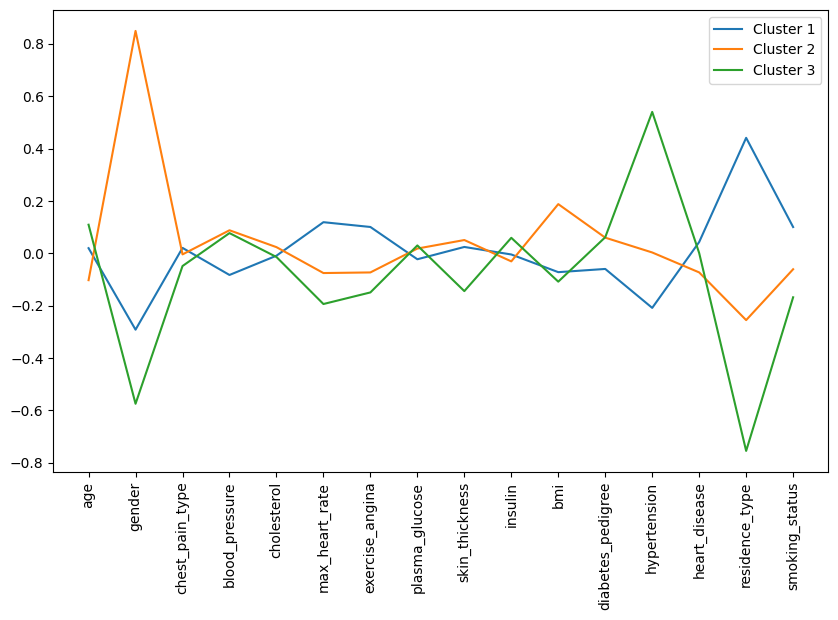

In [115]:
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

plt.figure(figsize=(10,6))
plt.plot(clustered_df3.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)
plt.show()

--> Cluster 1: Individuals belonging to this cluster have high heart rate, and positive angina exercise which indicates that thses individuals may have heart problems(HIGH RISK PATIENTS).

--> Cluster 2: Individuals belonging to this cluster have high blood pressure, more skin thickness, high bmi (LOW RISK PATIENTS).

--> Cluster 3:  Individuals belonging to this cluster have high blood pressure, high glucose level which may be a indicative of diabetes, higher chances of hypertension (HIGH RISK PATIENTS).


####  * Good Results are obtained from GMM and Hierarchical Clustering